In [2]:
!pip install tradingview_ta


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import yfinance as yf

# Define the symbol and dates for which you want to get historical stock prices
symbol = "AAPL"
start = "2021-01-01"
end = "2021-12-31"

# Get the historical stock prices
stock_prices = yf.download(symbol, start=start, end=end)

# Print the high, low, open, close, and volume
print(stock_prices["High"])
print(stock_prices["Low"])
print(stock_prices["Open"])
print(stock_prices["Close"])
print(stock_prices["Volume"])


[*********************100%***********************]  1 of 1 completed
Date
2021-01-04 00:00:00-05:00    133.610001
2021-01-05 00:00:00-05:00    131.740005
2021-01-06 00:00:00-05:00    131.050003
2021-01-07 00:00:00-05:00    131.630005
2021-01-08 00:00:00-05:00    132.630005
                                ...    
2021-12-23 00:00:00-05:00    176.850006
2021-12-27 00:00:00-05:00    180.419998
2021-12-28 00:00:00-05:00    181.330002
2021-12-29 00:00:00-05:00    180.630005
2021-12-30 00:00:00-05:00    180.570007
Name: High, Length: 251, dtype: float64
Date
2021-01-04 00:00:00-05:00    126.760002
2021-01-05 00:00:00-05:00    128.429993
2021-01-06 00:00:00-05:00    126.379997
2021-01-07 00:00:00-05:00    127.860001
2021-01-08 00:00:00-05:00    130.229996
                                ...    
2021-12-23 00:00:00-05:00    175.270004
2021-12-27 00:00:00-05:00    177.070007
2021-12-28 00:00:00-05:00    178.529999
2021-12-29 00:00:00-05:00    178.139999
2021-12-30 00:00:00-05:00    178.089996
N

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the symbol and dates for which you want to get historical stock prices
symbol = "AAPL"
start = "2021-01-01"
end = "2021-12-31"

# Get the historical stock prices
stock_prices = yf.download(symbol, start=start, end=end)

# Calculate the short-term and long-term SMAs
stock_prices["sma_short"] = stock_prices["Close"].rolling(window=20).mean()
stock_prices["sma_long"] = stock_prices["Close"].rolling(window=50).mean()

# Create a column to indicate when to buy
stock_prices["Buy"] = np.where((stock_prices["sma_short"] > stock_prices["sma_long"]) & (stock_prices["sma_short"].shift(1) <= stock_prices["sma_long"].shift(1)), 1, 0)

# Create a column to indicate when to sell
stock_prices["Sell"] = np.where((stock_prices["sma_short"] < stock_prices["sma_long"]) & (stock_prices["sma_short"].shift(1) >= stock_prices["sma_long"].shift(1)), 1, 0)

# Print the stock prices dataframe
print(stock_prices)


[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Date                                                                        
2021-01-04 00:00:00-05:00  133.520004  133.610001  126.760002  129.410004   
2021-01-05 00:00:00-05:00  128.889999  131.740005  128.429993  131.009995   
2021-01-06 00:00:00-05:00  127.720001  131.050003  126.379997  126.599998   
2021-01-07 00:00:00-05:00  128.360001  131.630005  127.860001  130.919998   
2021-01-08 00:00:00-05:00  132.429993  132.630005  130.229996  132.050003   
...                               ...         ...         ...         ...   
2021-12-23 00:00:00-05:00  175.850006  176.850006  175.270004  176.279999   
2021-12-27 00:00:00-05:00  177.089996  180.419998  177.070007  180.330002   
2021-12-28 00:00:00-05:00  180.160004  181.330002  178.529999  179.289993   
2021-12-29 00:00:00-05:00  179.330002  180.630005  178.139999  179.380005   
2021-12

[*********************100%***********************]  1 of 1 completed


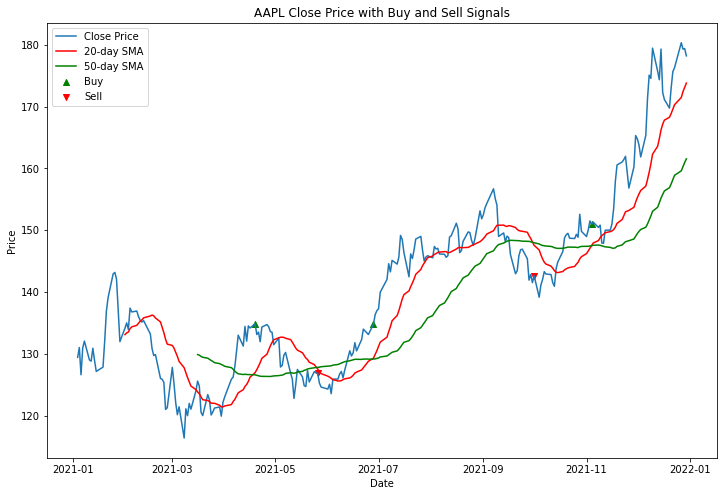

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the symbol and dates for which you want to get historical stock prices
symbol = "AAPL"
start = "2021-01-01"
end = "2021-12-31"

# Get the historical stock prices
stock_prices = yf.download(symbol, start=start, end=end)

# Calculate the short-term and long-term SMAs
stock_prices["sma_short"] = stock_prices["Close"].rolling(window=20).mean()
stock_prices["sma_long"] = stock_prices["Close"].rolling(window=50).mean()

# Create a column to indicate when to buy
stock_prices["Buy"] = np.where((stock_prices["sma_short"] > stock_prices["sma_long"]) & (stock_prices["sma_short"].shift(1) <= stock_prices["sma_long"].shift(1)), 1, 0)

# Create a column to indicate when to sell
stock_prices["Sell"] = np.where((stock_prices["sma_short"] < stock_prices["sma_long"]) & (stock_prices["sma_short"].shift(1) >= stock_prices["sma_long"].shift(1)), 1, 0)

# Create the plot
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(stock_prices["Close"], label="Close Price")
ax.plot(stock_prices["sma_short"], label="20-day SMA", color='r')
ax.plot(stock_prices["sma_long"], label="50-day SMA", color='g')

# Plot the buy and sell signals
ax.scatter(stock_prices.index[stock_prices["Buy"] == 1], stock_prices["Close"][stock_prices["Buy"] == 1], color='green', marker='^', label='Buy')
ax.scatter(stock_prices.index[stock_prices["Sell"] == 1], stock_prices["Close"][stock_prices["Sell"] == 1], color='red', marker='v', label='Sell')

# Add the legend and labels
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{symbol} Close Price with Buy and Sell Signals')

# Show the plot
plt.show()


In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_prices(stock_ticker):
    """
    Retrieve stock prices for the given ticker from Yahoo Finance API.
    """
    stock_data = yf.download(stock_ticker)
    stock_data = stock_data.rename(columns={'Open':'Open','High':'High','Low':'Low','Close':'Close','Adj Close':'Adj Close','Volume':'Volume'})
    return stock_data

def create_entry_strategy(stock_prices):
    """
    Create a column to indicate when to buy and sell based on the entry strategy.
    """
    stock_prices['sma_short'] = stock_prices['Close'].rolling(window=20).mean()
    stock_prices['sma_long'] = stock_prices['Close'].rolling(window=50).mean()
    stock_prices['Buy'] = np.where(stock_prices['sma_short'] > stock_prices['sma_long'], 1, 0)
    stock_prices['Sell'] = np.where(stock_prices['sma_short'] < stock_prices['sma_long'], -1, 0)
    return stock_prices

def calculate_return(stock_prices):
    """
    Calculate the overall profit/loss of the strategy.
    """
    stock_prices['return'] = stock_prices['Close'].pct_change()
    return stock_prices

def plot_graph(stock_prices):
    """
    Plot the stock prices, buy/sell signals, and other indicators.
    """
    plt.figure(figsize=(15,5))
    plt.plot(stock_prices['Close'], label='Close Price')
    plt.plot(stock_prices['sma_short'], label='20 days SMA')
    plt.plot(stock_prices['sma_long'], label='50 days SMA')
    plt.scatter(stock_prices.index, stock_prices['Close'], c=stock_prices['Buy'] + stock_prices['Sell'], cmap='viridis')
    plt.legend(loc='best')
    plt.show()

def main():
    """
    Main function to execute the trading strategy.
    """
    # Get stock prices
    stock_ticker = "AAPL"
    stock_prices = get_stock_prices(stock_ticker)

    # Create entry strategy
    stock_prices = create_entry_strategy(stock_prices)

    # Calculate return
    stock_prices = calculate_return(stock_prices)

    # Plot graph
    plot_graph(stock_prices)



In [12]:
stock_prices.tail(1)

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,Buy,Sell
Date,,,,,,,,,,
2021-12-30 00:00:00-05:00,179.470001,180.570007,178.089996,178.199997,177.171722,59773000,173.791,161.531401,0,0


[*********************100%***********************]  1 of 1 completed


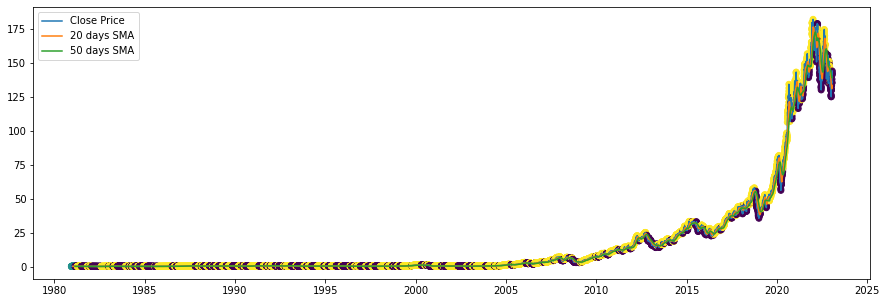

In [13]:
#if __name__ == "__main__":
main()

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_prices(stock_ticker, start_date, end_date):
    """
    Retrieve stock prices for the given ticker from Yahoo Finance API within the given date range.
    """
    stock_data = yf.download(stock_ticker, start=start_date, end=end_date)
    stock_data = stock_data.rename(columns={'Open':'Open','High':'High','Low':'Low','Close':'Close','Adj Close':'Adj Close','Volume':'Volume'})
    return stock_data

def create_entry_strategy(stock_prices):
    """
    Create a column to indicate when to buy and sell based on the entry strategy.
    """
    stock_prices['sma_short'] = stock_prices['Close'].rolling(window=20).mean()
    stock_prices['sma_long'] = stock_prices['Close'].rolling(window=50).mean()
    stock_prices['Buy'] = np.where(stock_prices['sma_short'] > stock_prices['sma_long'], 1, 0)
    stock_prices['Sell'] = np.where(stock_prices['sma_short'] < stock_prices['sma_long'], -1, 0)
    return stock_prices

def calculate_return(stock_prices):
    """
    Calculate the overall profit/loss of the strategy.
    """
    stock_prices['return'] = stock_prices['Close'].pct_change()
    return stock_prices

# def plot_graph(stock_prices, start_date, end_date):
#     """
#     Plot the stock prices, buy/sell signals, and other indicators within the given date range.
#     """
#     plt.figure(figsize=(15,5))
#     plt.plot(stock_prices['Close'], label='Close Price')
#     plt.plot(stock_prices['sma_short'], label='20 days SMA')
#     plt.plot(stock_prices['sma_long'], label='50 days SMA')
#     plt.scatter(stock_prices.index, stock_prices['Close'], c=stock_prices['Buy'] + stock_prices['Sell'], cmap='viridis')
#     plt.legend(loc='best')
#     plt.xlim(start_date, end_date)
#     plt.show()
def plot_graph(stock_prices, start_date, end_date):
    plt.figure(figsize=(15,10))
    plt.plot(stock_prices.index, stock_prices['Close'], label='Close')
    plt.plot(stock_prices['sma_short'], label='20 days SMA')
    plt.plot(stock_prices['sma_long'], label='50 days SMA')
    plt.scatter(stock_prices.index, stock_prices['Close'], c=stock_prices['Buy'] + stock_prices['Sell'], cmap='viridis')
    plt.legend(loc='best')
    plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
    plt.show()

def main():
    """
    Main function to execute the trading strategy.
    """
    # Get stock prices
    stock_ticker = "AAPL"
    start_date = '2022-01-01'
    end_date = '2022-12-31'
    stock_prices = get_stock_prices(stock_ticker, start_date, end_date)

    # Create entry strategy
    stock_prices = create_entry_strategy(stock_prices)

    # Calculate return
    stock_prices = calculate_return(stock_prices)

    # Plot graph
    plot_graph(stock_prices, start_date, end_date)



[*********************100%***********************]  1 of 1 completed


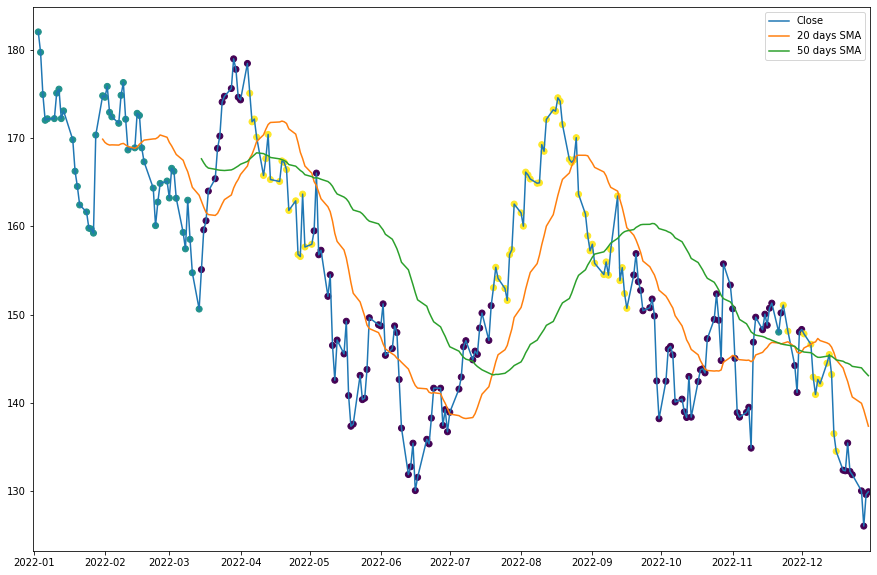

In [18]:
main()

In [21]:
df=pd.DataFrame(stock_prices)
df.tail(1)
df.to_csv('./stock_data.csv')

In [22]:
import pandas as pd
import numpy as np

def strategy(data):
    # Indicators
    data['SMA20'] = data['Close'].rolling(window=20).mean()
    data['SMA50'] = data['Close'].rolling(window=50).mean()
    data['SMA200'] = data['Close'].rolling(window=200).mean()
    
    # Strategy
    data['Position'] = np.where(data['SMA20'] > data['SMA50'], 1, -1)
    data['Position'] = np.where(data['SMA50'] > data['SMA200'], 1, data['Position'])
    data['Position'] = np.where(data['SMA20'] < data['SMA50'], -1, data['Position'])
    data['Position'] = np.where(data['SMA50'] < data['SMA200'], -1, data['Position'])
    data['Position'] = np.where(data['SMA20'].isna(), 0, data['Position'])
    data['Position'] = np.where(data['SMA50'].isna(), 0, data['Position'])
    data['Position'] = np.where(data['SMA200'].isna(), 0, data['Position'])
    
    # Backtesting
    data['Returns'] = np.log(data['Close']/data['Close'].shift(1))
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    return data

# Load data
data = pd.read_csv('./stock_data.csv')

# Apply strategy
data = strategy(data)

# Calculate performance metrics
cumulative_returns = np.exp(data['Strategy'].cumsum())
sharpe_ratio = data['Strategy'].mean() / data['Strategy'].std() * np.sqrt(252)
win_rate = len(data[data['Returns'] > 0]) / len(data)

# Print results
print("Cumulative returns: {:.2f}%".format(cumulative_returns[-1] * 100))
print("Sharpe ratio: {:.2f}".format(sharpe_ratio))
print("Win rate: {:.2f}%".format(win_rate * 100))


KeyError: -1

In [23]:
data.tail(1)

,Date,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,Buy,Sell,SMA20,SMA50,SMA200,Position,Returns,Strategy
250,2021-12-30 00:00:00-05:00,179.470001,180.570007,178.089996,178.199997,177.171722,59773000,173.791,161.531401,0,0,173.791,161.531401,143.66845,1,-0.0066,-0.0066


In [70]:
def strategy(data):
    # Indicators
    data['SMA20'] = data['Close'].rolling(window=20).mean()
    data['SMA50'] = data['Close'].rolling(window=50).mean()
    data['SMA200'] = data['Close'].rolling(window=200).mean()
    
    # Strategy
    data['Position'] = np.where(data['SMA20'] > data['SMA50'], 1, -1)
    data['Position'] = np.where(data['SMA50'] > data['SMA200'], 1, data['Position'])
    data['Position'] = np.where(data['SMA20'] < data['SMA50'], -1, data['Position'])
    data['Position'] = np.where(data['SMA50'] < data['SMA200'], -1, data['Position'])
    data['Position'] = np.where(data['SMA20'].isna(), 0, data['Position'])
    data['Position'] = np.where(data['SMA50'].isna(), 0, data['Position'])
    data['Position'] = np.where(data['SMA200'].isna(), 0, data['Position'])
    
    # Backtesting
    data['Returns'] = np.log(data['Close']/data['Close'].shift(1))
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    
    return data['Position']

def backtest(data, strategy_func):
    # Initialize variables
    portfolio = 100000
    positions = []
    returns = []

    # Backtest
    for i, row in data.iterrows():
        # Get strategy signal
        signal = strategy_func(data)
        
        # Go long
        if signal[i] == 1:
            positions.append(portfolio / row["Close"])
            portfolio = 0
        # Go short
        elif signal[i] == -1:
            positions.append(portfolio)
            portfolio = portfolio / row["Close"]
        # Exit position
        elif signal[i] == 0:
            if len(positions) > 0:
                portfolio = positions[-1] * row["Close"]
                positions = []
           
        # Calculate returns
        if len(positions) > 0:
            if positions[0] != 0:
                returns.append(positions[-1] * row["Close"] / positions[0] - 1)
            else:
                returns.append(0)
        else:
            returns.append(0)



    # Create dataframe
    data['portfolio'] = portfolio
    data["Returns"] = returns
    data["Returns"] = data["Returns"].cumsum()
    return data

# Run backtest
data = backtest(data, strategy)

# Calculate statistics
cumulative_returns = data["Returns"]
sharpe_ratio = (data["Returns"].mean() / (data["Returns"].std() + 0.0001)) * np.sqrt(252)
win_rate = len(data[data['Returns'] > 0]) / len(data)

# Print results
try:
    print("Cumulative returns: {:.2f}%".format(cumulative_returns.iloc[-1] * 100))
except:
    print("Cumulative returns: N/A")


Cumulative returns: 9557.20%


In [67]:
data["Returns"][-2:-1]*100

249    9657.197596
Name: Returns, dtype: float64

In [68]:
print("Cumulative returns: {:.2f}%".format(data["Returns"].iloc[-1] * 100))

Cumulative returns: 9557.20%


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
 7   sma_short  232 non-null    float64
 8   sma_long   202 non-null    float64
 9   Buy        251 non-null    int64  
 10  Sell       251 non-null    int64  
 11  SMA20      232 non-null    float64
 12  SMA50      202 non-null    float64
 13  SMA200     52 non-null     float64
 14  Position   251 non-null    int32  
 15  Returns    251 non-null    int64  
 16  Strategy   250 non-null    float64
dtypes: float64(11), int32(1), int64(4), object(1)
memory usage: 32.5+ KB


In [71]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_long,Buy,Sell,SMA20,SMA50,SMA200,Position,Returns,Strategy,portfolio
246,2021-12-23 00:00:00-05:00,175.850006,176.850006,175.270004,176.279999,175.262802,68356600,170.2870,158.865601,0,0,170.2870,158.865601,142.55920,1,99.571976,0.003637,0
247,2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.289444,74919600,171.4630,159.597001,0,0,171.4630,159.597001,142.85570,1,98.571976,0.022715,0
248,2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.255447,79144300,172.4155,160.286001,0,0,172.4155,160.286001,143.13220,1,97.571976,-0.005784,0
249,2021-12-29 00:00:00-05:00,179.330002,180.630005,178.139999,179.380005,178.344925,62348900,173.1195,160.942601,0,0,173.1195,160.942601,143.40125,1,96.571976,0.000502,0
250,2021-12-30 00:00:00-05:00,179.470001,180.570007,178.089996,178.199997,177.171722,59773000,173.7910,161.531401,0,0,173.7910,161.531401,143.66845,1,95.571976,-0.006600,0
